In [ ]:
import cv2
import numpy as np
import types
from google.colab.patches import cv2_imshow #Google colab crashes if you try to display 
#image using cv2.imshow() thus use this import

In [6]:
def messageToBinary(message):
  if type(message) == str:
    return ''.join([ format(ord(i), "08b") for i in message ])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message ]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type not supported")

In [7]:
def hideData(image, secret_message):

  # calculate the maximum bytes to encode
  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #Check if the number of bytes to encode is less than the maximum bytes in the image
  if len(secret_message) > n_bytes:
      raise ValueError("Error encountered insufficient bytes, need bigger image or less data !!")
  
  secret_message += "#####" # you can use any string as the delimeter

  data_index = 0
  # convert input data to binary format using messageToBinary() fucntion
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg) #Find the length of data that needs to be hidden
  for values in image:
      for pixel in values:
          # convert RGB values to binary format
          r, g, b = messageToBinary(pixel)
          # modify the least significant bit only if there is still data to store
          if data_index < data_len:
              # hide the data into least significant bit of red pixel
              pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of green pixel
              pixel[1] = int(g[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          if data_index < data_len:
              # hide the data into least significant bit of  blue pixel
              pixel[2] = int(b[:-1] + binary_secret_msg[data_index], 2)
              data_index += 1
          # if data is encoded, just break out of the loop
          if data_index >= data_len:
              break

  return image

In [8]:
def encode_text(): 
  image_name = input("Enter image name(with extension): ") 
  image = cv2.imread(image_name) # Read the input image using OpenCV-Python.
  #It is a library of Python bindings designed to solve computer vision problems. 
  
  #details of the image
  print("The shape of the image is: ",image.shape) #check the shape of image to calculate the number of bytes in it
  print("The original image is as shown below: ")
  resized_image = cv2.resize(image, (500, 500)) #resize the image as per your requirement
  cv2_imshow(resized_image) #display the image
  
      
  data = input("Enter data to be encoded : ") 
  if (len(data) == 0): 
    raise ValueError('Data is empty')
  
  filename = input("Enter the name of new encoded image(with extension): ")
  encoded_image = hideData(image, data) # call the hideData function to hide the secret message into the selected image
  cv2.imwrite(filename, encoded_image)

 

Image Steganography 
 1. Encode the data 
 2. Decode the data 
 Your input is: 1

Encoding....
Enter image name(with extension): opencv_frame.png
The shape of the image is:  (720, 1280, 3)
The original image is as shown below: 


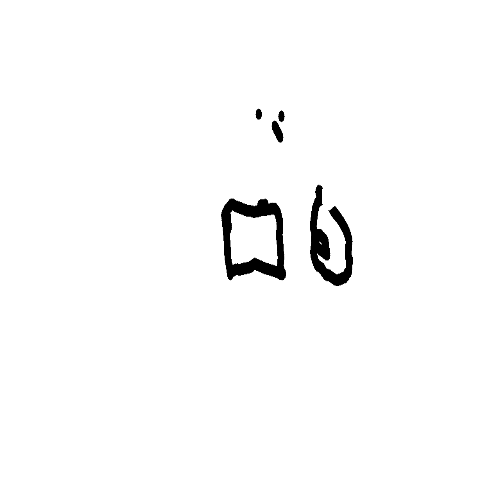

Enter data to be encoded : hiiii
Enter the name of new encoded image(with extension): test.png
Maximum bytes to encode: 345600


In [9]:
def Steganography(): 
    a = input("Image Steganography \n 1. Encode the data \n 2. Decode the data \n Your input is: ")
    userinput = int(a)
    if (userinput == 1):
      print("\nEncoding....")
      encode_text() 
          
    # elif (userinput == 2):
    #   print("\nDecoding....") 
    #   print("Decoded message is " + decode_text()) 
    else: 
        raise Exception("Enter correct input") 
          
Steganography() #encode image